Introduction

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

#configure visualisation
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

def log(message):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"[{timestamp}] {message}")
log("ETL Pipeline Intialised")

[2025-03-08 19:26:10] ETL Pipeline Intialised


Extraction

In [35]:
df = pd.read_csv("data/StudentsPerformance.csv")

# sample data and info
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Data Validation

In [46]:
#check for duplicates
duplicates = df.duplicated().sum()
print(duplicates)

#check score range
score_columns = ['math_score', 'reading_score', 'writing_score']
for col in score_columns:
        if col in df.columns:
            invalid_scores = ((df[col] < 0) | (df[col] > 100)).sum()
            print(f"invalid scores sum in {col}: {invalid_scores}")







0


Transformation

(1000, 11)


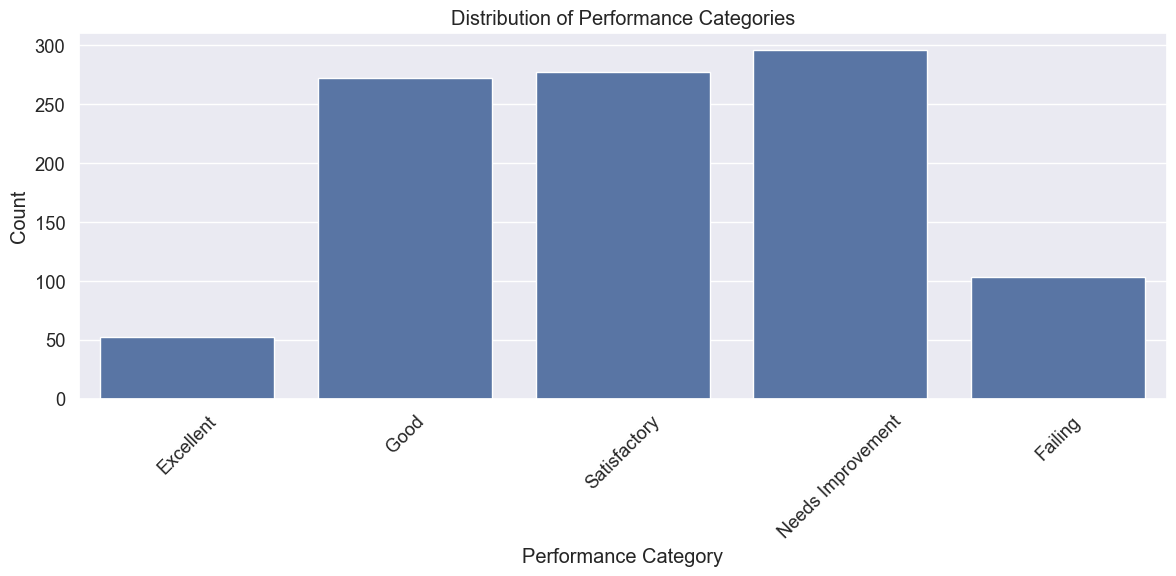

In [51]:
transformed_df = df.copy()

#remove spaces for column names
transformed_df.columns = [col.replace(' ', "_") for col in transformed_df.columns]

# create a column for scores
transformed_df['total_score'] = transformed_df['math_score'] + transformed_df['reading_score'] + transformed_df['writing_score']

# create column for average scores
transformed_df['average_score'] = transformed_df['total_score'] / 3

#create performance category
conditions = [
        (transformed_df['average_score'] >= 90),
        (transformed_df['average_score'] >= 75) & (transformed_df['average_score'] < 90),
        (transformed_df['average_score'] >= 65) & (transformed_df['average_score'] < 75),
        (transformed_df['average_score'] >= 50) & (transformed_df['average_score'] < 65),
        (transformed_df['average_score'] < 50)
]

choices = ['Excellent', 'Good', 'Satisfactory', 'Needs Improvement', 'Failing']
transformed_df['performance_category'] = np.select(conditions, choices, default='Unknown')

print(transformed_df.shape)

plt.figure(figsize=(12, 6))
sns.countplot(data=transformed_df, x='performance_category', order=choices)
plt.title('Distribution of Performance Categories')
plt.xlabel('Performance Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






Load Data

In [61]:
output_path = "data/student_performance_processed.csv"
transformed_df.to_csv(output_path, index=False)



